In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

import random
from PIL import Image
import glob    
import tensorflow as tf
from tensorflow import keras
import numpy as np

from tensorflow.keras.layers import Concatenate
from tensorflow.keras.utils import plot_model

# 가위:0, 바위:1, 보:2   load_data() 함수만들기(학습데이터 만들기)

In [2]:
def load_data(img_path, number_of_data):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=224
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")

    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_ori"
(x_train, y_train)=load_data(image_dir_path, 906) 
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

x_train_reshaped = x_train_norm
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 906 입니다.
x_train shape: (906, 224, 224, 3)
y_train shape: (906,)


라벨:  0


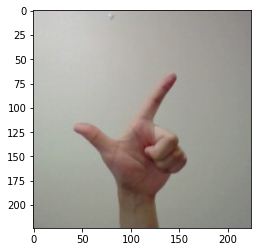

In [3]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 딥러닝 네트워크 설계 및 확인

In [7]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2986016   
_________________________________________________________________
dense_3 (Dense)              (

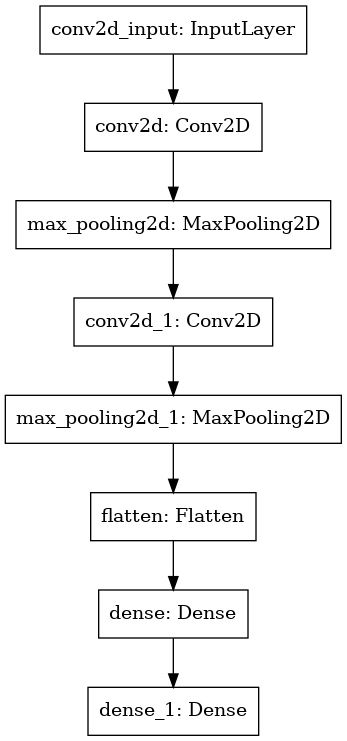

In [5]:
plot_model(model)

# 딥러닝 학습하기

In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
29/29 [==============================] - 4s 28ms/step - loss: 2.1442 - accuracy: 0.3808
Epoch 2/10
29/29 [==============================] - 1s 20ms/step - loss: 0.7738 - accuracy: 0.6126
Epoch 3/10
29/29 [==============================] - 1s 20ms/step - loss: 0.5371 - accuracy: 0.6832
Epoch 4/10
29/29 [==============================] - 1s 20ms/step - loss: 0.3629 - accuracy: 0.8587
Epoch 5/10
29/29 [==============================] - 1s 20ms/step - loss: 0.1394 - accuracy: 0.9735
Epoch 6/10
29/29 [==============================] - 1s 20ms/step - loss: 0.0526 - accuracy: 0.9834
Epoch 7/10
29/29 [==============================] - 1s 20ms/step - loss: 0.0429 - accuracy: 0.9901
Epoch 8/10
29/29 [==============================] - 1s 20ms/step - loss: 0.0160 - accuracy: 1.0000
Epoch 9/10
29/29 [==============================] - 1s 20ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 10/10
29/29 [==============================] - 1s 20ms/step - loss: 0.0080 - accuracy: 1.0000


# 시험데이터 만들기

In [9]:
def load_test_data(image_test_path, number_of_data):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=224
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(image_test_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(image_test_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(image_test_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("시험데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels
image_test_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_ori/new_test"
(x_test, y_test)=load_test_data(image_test_path,300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
x_test_reshaped = x_test_norm
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

시험데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 224, 224, 3)
y_test shape: (300,)


라벨:  0


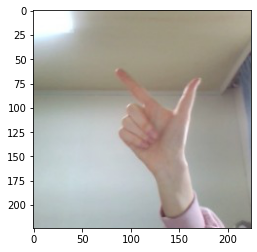

In [10]:
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

# 정확도 테스트

In [11]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.6403 - accuracy: 0.6000
test_loss: 1.6402682065963745 
test_accuracy: 0.6000000238418579
